#### ディープラーニング基礎
- https://zenn.dev/joel/articles/575b7c20aa780c

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Test 1

Epoch 1/3


c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4615 - loss: 1.7636
Epoch 2/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8273 - loss: 0.7165
Epoch 3/3
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8732 - loss: 0.5036


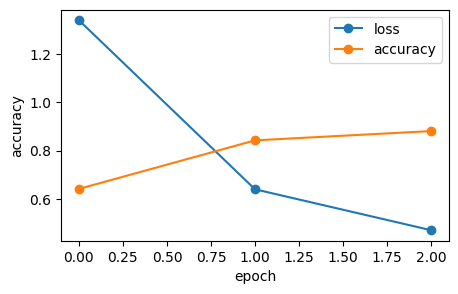

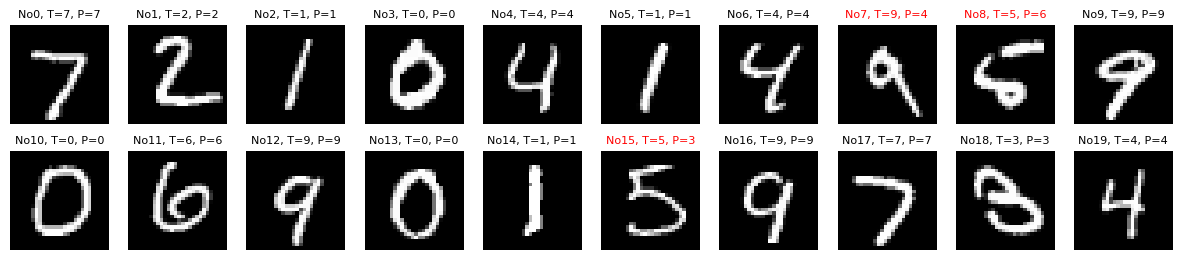

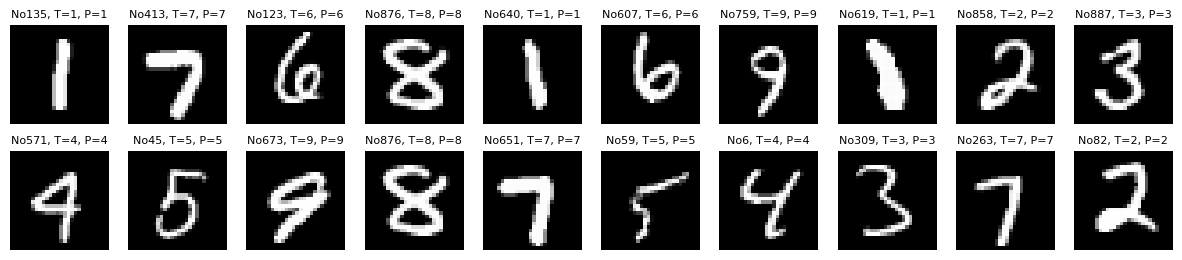

In [2]:
tf.random.set_seed(32)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

shapes = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], shapes)[:6000]
x_test = x_test.reshape(x_test.shape[0], shapes)[:1000]
# y_train = to_categorical(y_train)[:6000]
# y_test = to_categorical(y_test)[:1000]
y_train = y_train[:6000]
y_test = y_test[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784, name='dense_1'))
model.add(Activation('sigmoid', name='sigmoid'))
model.add(Dense(128, name='dense_2'))
model.add(Activation('relu', name='relu'))
model.add(Dense(10, name='dense_3'))
model.add(Activation('softmax', name='softmax'))

# model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.summary()

history = model.fit(x_train, y_train, verbose=1, epochs=3)


plt.figure(figsize=(5, 3))
plt.plot(history.history['loss'], label='loss', marker='o')
plt.plot(history.history['accuracy'], label='accuracy', marker='o')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

# 結果処理
pd.options.display.float_format = '{:.05f}'.format
predictions = model.predict(x_test, verbose=0)
df_prob = pd.DataFrame(predictions)
df_prob['prob'] = df_prob.iloc[:, :10].idxmax(axis=1)
df_prob['y_test'] = y_test
# df_prob.head(3)

# 最初の10枚
row, col = 2, 10
fig, axs = plt.subplots(row, col, figsize=(col*1.5, row*1.5))
num = 0
for i in range(row):
    for j in range(col):
        axs[i][j].imshow(x_test[num].reshape((28,28)), "gray")
        pred = df_prob['prob'][num]
        if pred != y_test[num]:
            axs[i][j].set_title(f'No{num}, T={y_test[num]}, P={pred}', color='r', fontsize=8)
        else:
            axs[i][j].set_title(f'No{num}, T={y_test[num]}, P={pred}', fontsize=8)
        axs[i][j].axis('off')
        num += 1
plt.show()

# ランダムに10枚
row, col = 2, 10
fig, axs = plt.subplots(row, col, figsize=(col*1.5, row*1.5))
for i in range(row):
    for j in range(col):
        num = np.random.randint(1000)
        axs[i][j].imshow(x_test[num].reshape((28,28)), "gray")
        pred = df_prob['prob'][num]
        if pred != y_test[num]:
            axs[i][j].set_title(f'No{num}, T={y_test[num]}, P={pred}', color='r', fontsize=8)
        else:
            axs[i][j].set_title(f'No{num}, T={y_test[num]}, P={pred}', fontsize=8)
        axs[i][j].axis('off')
# plt.tight_layout()
plt.show()

In [10]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    shapes = x_train.shape[1] * x_train.shape[2]
    x_train = x_train.reshape(x_train.shape[0], shapes)[:6000]
    x_test = x_test.reshape(x_test.shape[0], shapes)[:1000]
    y_train = y_train[:6000]
    y_test = y_test[:1000]

    return x_train, y_train, x_test, y_test


def model_compile_fit(x_train, y_train, x_test, y_test, model, optimizer, batch_size, epochs, verbose, csv_path):

    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    callbacks = [tf.keras.callbacks.CSVLogger(csv_path)]

    history = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=verbose,
        validation_data=(x_test, y_test),
        callbacks=callbacks,
    )

    return history

def plot(history):
    plt.figure(figsize=(5, 3))
    plt.plot(history.history['accuracy'], label='accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='val_accaccuracy', marker='x')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='best')
    plt.show()

# Test 1

Epoch 1/3
188/188 - 2s - 11ms/step - accuracy: 0.6365 - loss: 1.3380 - val_accuracy: 0.7370 - val_loss: 0.9289
Epoch 2/3
188/188 - 1s - 6ms/step - accuracy: 0.8398 - loss: 0.6475 - val_accuracy: 0.8340 - val_loss: 0.6430
Epoch 3/3
188/188 - 1s - 5ms/step - accuracy: 0.8808 - loss: 0.4759 - val_accuracy: 0.8400 - val_loss: 0.5340


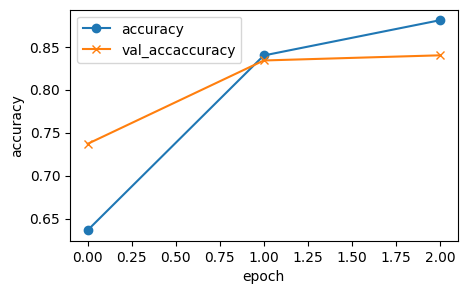

In [11]:
def model_sequential():

    model = Sequential()

    model.add(Dense(256, input_dim=784))
    model.add(Activation('sigmoid'))

    model.add(Dense(128))
    model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

BATCH_SIZE = 32
EPOCHS = 3
CSV_FILE_PATH = 'tensorflow_test_03.csv'
VERBOSE = 2
OPTIMIZERS = "sgd"

tf.random.set_seed(32)
x_train, y_train, x_test, y_test = load_data()
model = model_sequential()
history = model_compile_fit(x_train, y_train, x_test, y_test, model, OPTIMIZERS, BATCH_SIZE, EPOCHS, VERBOSE, CSV_FILE_PATH)
plot(history)

# test 2

Epoch 1/3
188/188 - 2s - 9ms/step - accuracy: 0.1780 - loss: 2.2866 - val_accuracy: 0.5490 - val_loss: 1.9335
Epoch 2/3
188/188 - 1s - 5ms/step - accuracy: 0.3530 - loss: 1.9042 - val_accuracy: 0.6570 - val_loss: 1.6419
Epoch 3/3
188/188 - 1s - 4ms/step - accuracy: 0.5050 - loss: 1.6125 - val_accuracy: 0.6880 - val_loss: 1.4115


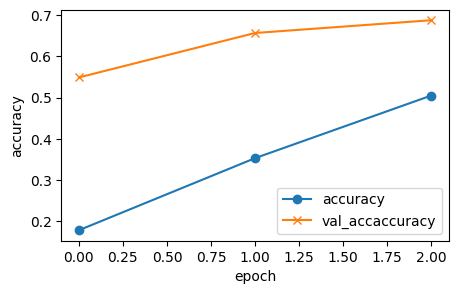

In [5]:
def model_sequential_2():

    model = Sequential()

    model.add(Dense(256, input_dim=784))
    model.add(Activation('sigmoid'))

    model.add(Dense(128))
    model.add(Activation('sigmoid'))

    model.add(Dropout(rate=0.5))
    model.add(Dense(10))
    model.add(Activation("softmax"))

    return model

BATCH_SIZE = 32
EPOCHS = 3
CSV_FILE_PATH = 'tensorflow_test_03_2.csv'
VERBOSE = 2

tf.random.set_seed(32)
x_train, y_train, x_test, y_test = load_data()
model = model_sequential_2()
history = model_compile_fit(x_train, y_train, x_test, y_test, model, OPTIMIZERS, BATCH_SIZE, EPOCHS, VERBOSE, CSV_FILE_PATH)
plot(history)

# Test 3

Epoch 1/3
188/188 - 2s - 11ms/step - accuracy: 0.0978 - loss: 2.3932 - val_accuracy: 0.1000 - val_loss: 2.3056
Epoch 2/3
188/188 - 1s - 4ms/step - accuracy: 0.1090 - loss: 2.3079 - val_accuracy: 0.1510 - val_loss: 2.2843
Epoch 3/3
188/188 - 1s - 5ms/step - accuracy: 0.1312 - loss: 2.2877 - val_accuracy: 0.2170 - val_loss: 2.2728


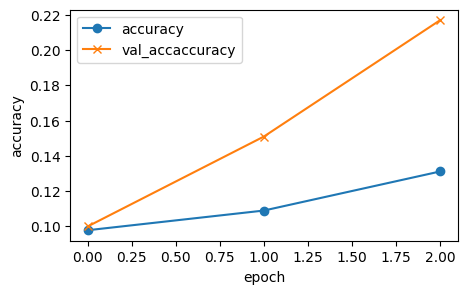

In [12]:
def model_sequential_3():

    model = Sequential()

    model.add(Dense(256, input_dim=784))
    model.add(Activation('sigmoid'))

    model.add(Dense(128))
    model.add(Activation('sigmoid'))

    model.add(Dense(10))
    model.add(Activation('sigmoid'))

    model.add(Dropout(rate=0.5))
    model.add(Dense(10))
    model.add(Activation("softmax"))

    return model

BATCH_SIZE = 32
EPOCHS = 3
CSV_FILE_PATH = 'tensorflow_test_03_3.csv'
VERBOSE = 2

tf.random.set_seed(32)
x_train, y_train, x_test, y_test = load_data()
model = model_sequential_3()
history = model_compile_fit(x_train, y_train, x_test, y_test, model, OPTIMIZERS, BATCH_SIZE, EPOCHS, VERBOSE, CSV_FILE_PATH)
plot(history)

# Test 4

Epoch 1/3
188/188 - 3s - 14ms/step - accuracy: 0.1527 - loss: 2.3774 - val_accuracy: 0.2310 - val_loss: 2.0202
Epoch 2/3
188/188 - 1s - 8ms/step - accuracy: 0.3138 - loss: 1.9754 - val_accuracy: 0.4960 - val_loss: 1.6613
Epoch 3/3
188/188 - 2s - 8ms/step - accuracy: 0.4693 - loss: 1.6343 - val_accuracy: 0.6000 - val_loss: 1.3535


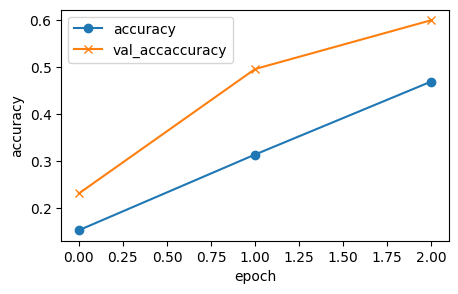

In [13]:
def model_sequential_5():

    model = Sequential()

    model.add(Dense(256, input_dim=784))
    model.add(Activation('sigmoid'))

    model.add(Dense(1568))
    model.add(Activation('sigmoid'))

    model.add(Dropout(rate=0.5))
    model.add(Dense(10))
    model.add(Activation("softmax"))


    return model

BATCH_SIZE = 32
EPOCHS = 3
CSV_FILE_PATH = 'tensorflow_test_03_4.csv'
VERBOSE = 2

tf.random.set_seed(32)
x_train, y_train, x_test, y_test = load_data()
model = model_sequential_5()
history = model_compile_fit(x_train, y_train, x_test, y_test, model, OPTIMIZERS, BATCH_SIZE, EPOCHS, VERBOSE, CSV_FILE_PATH)
plot(history)

# Test 5

Epoch 1/5
188/188 - 2s - 10ms/step - accuracy: 0.1822 - loss: 2.3061 - val_accuracy: 0.5910 - val_loss: 1.9151
Epoch 2/5
188/188 - 1s - 4ms/step - accuracy: 0.3603 - loss: 1.8882 - val_accuracy: 0.6510 - val_loss: 1.6289
Epoch 3/5
188/188 - 1s - 4ms/step - accuracy: 0.4963 - loss: 1.6181 - val_accuracy: 0.7150 - val_loss: 1.3976
Epoch 4/5
188/188 - 1s - 4ms/step - accuracy: 0.5838 - loss: 1.4020 - val_accuracy: 0.7550 - val_loss: 1.2132
Epoch 5/5
188/188 - 1s - 5ms/step - accuracy: 0.6522 - loss: 1.2320 - val_accuracy: 0.7830 - val_loss: 1.0677


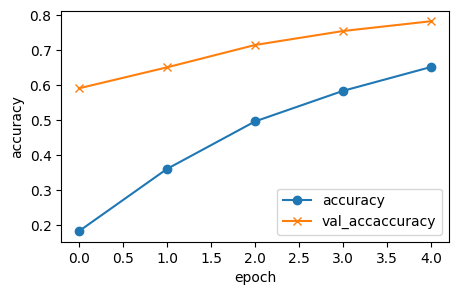

In [14]:
def model_sequential_5():

    model = Sequential()

    model.add(Dense(256, input_dim=784))
    model.add(Activation('sigmoid'))

    model.add(Dense(128))
    model.add(Activation('sigmoid'))

    model.add(Dropout(rate=0.5))

    model.add(Dense(10))
    model.add(Activation("softmax"))

    return model

BATCH_SIZE = 32
EPOCHS = 5
CSV_FILE_PATH = 'tensorflow_test_03_5.csv'
VERBOSE = 2

tf.random.set_seed(32)
x_train, y_train, x_test, y_test = load_data()
model = model_sequential_5()
history = model_compile_fit(x_train, y_train, x_test, y_test, model, OPTIMIZERS, BATCH_SIZE, EPOCHS, VERBOSE, CSV_FILE_PATH)
plot(history)

# test 6

Epoch 1/5
188/188 - 2s - 9ms/step - accuracy: 0.4125 - loss: 1.7372 - val_accuracy: 0.6400 - val_loss: 1.1695
Epoch 2/5
188/188 - 1s - 4ms/step - accuracy: 0.6585 - loss: 1.0643 - val_accuracy: 0.7250 - val_loss: 0.8775
Epoch 3/5
188/188 - 1s - 5ms/step - accuracy: 0.7298 - loss: 0.8617 - val_accuracy: 0.7610 - val_loss: 0.7845
Epoch 4/5
188/188 - 1s - 5ms/step - accuracy: 0.7428 - loss: 0.8196 - val_accuracy: 0.7800 - val_loss: 0.7131
Epoch 5/5
188/188 - 1s - 5ms/step - accuracy: 0.7555 - loss: 0.7616 - val_accuracy: 0.7820 - val_loss: 0.6935


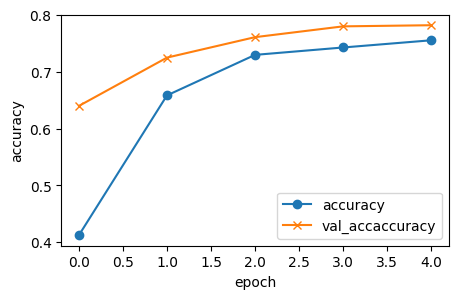

In [24]:
def model_sequential_6():

    model = Sequential()

    model.add(Dense(256, input_dim=784))
    model.add(Activation('sigmoid'))

    model.add(Dense(128))
    model.add(Activation('sigmoid'))

    model.add(Dropout(rate=0.5))

    model.add(Dense(10))
    model.add(Activation("softmax"))

    return model

OPTIMIZERS = tf.optimizers.SGD(learning_rate=0.1)
BATCH_SIZE = 32
EPOCHS = 5
CSV_FILE_PATH = 'tensorflow_test_03_6.csv'
VERBOSE = 2


tf.random.set_seed(32)
x_train, y_train, x_test, y_test = load_data()
model = model_sequential_6()
history = model_compile_fit(x_train, y_train, x_test, y_test, model, OPTIMIZERS, BATCH_SIZE, EPOCHS, VERBOSE, CSV_FILE_PATH)
plot(history)

# Test 7

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1316 - loss: 2.4037 - val_accuracy: 0.5400 - val_loss: 1.9595
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3098 - loss: 2.0046 - val_accuracy: 0.6440 - val_loss: 1.6990
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4484 - loss: 1.7395 - val_accuracy: 0.6830 - val_loss: 1.4779
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5550 - loss: 1.5207 - val_accuracy: 0.7150 - val_loss: 1.2939
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6133 - loss: 1.3250 - val_accuracy: 0.7460 - val_loss: 1.1393
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6817 - loss: 1.1575 - val_accuracy: 0.7850 - val_loss: 1.0131
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7177 - loss: 1.0282 - val_accuracy: 0.8020 - val_loss: 0.9082
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7515 - loss: 0.9615 - val_accuracy: 0.

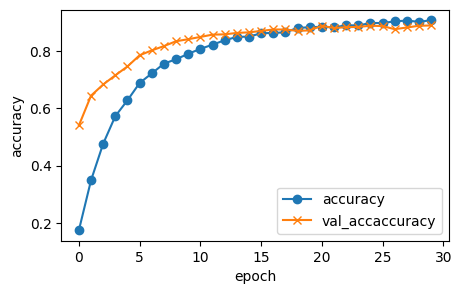

In [32]:
def model_sequential_7():

    model = Sequential()

    model.add(Dense(256, input_dim=784))
    model.add(Activation('sigmoid'))

    model.add(Dense(128))
    model.add(Activation('sigmoid'))

    model.add(Dropout(rate=0.5))

    model.add(Dense(10))
    model.add(Activation("softmax"))

    return model

OPTIMIZERS = tf.optimizers.SGD(learning_rate=0.01)
BATCH_SIZE = 32
EPOCHS = 30
CSV_FILE_PATH = 'tensorflow_test_03_7.csv'
VERBOSE = 1

tf.random.set_seed(32)
x_train, y_train, x_test, y_test = load_data()
model = model_sequential_7()
history = model_compile_fit(x_train, y_train, x_test, y_test, model, OPTIMIZERS, BATCH_SIZE, EPOCHS, VERBOSE, CSV_FILE_PATH)
plot(history)